# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flight at 8.40am from DUB to...
1,✅ Trip Verified | Terrible. I have traveled t...
2,✅ Trip Verified | The customer service is ugl...
3,✅ Trip Verified | Most uncomfortable flight I...
4,✅ Trip Verified | I booked our first out of c...


In [5]:
df.to_csv("Data/BA_reviews.csv")
df.head()

,reviews
0,✅ Trip Verified | Flight at 8.40am from DUB to...
1,✅ Trip Verified | Terrible. I have traveled t...
2,✅ Trip Verified | The customer service is ugl...
3,✅ Trip Verified | Most uncomfortable flight I...
4,✅ Trip Verified | I booked our first out of c...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
df

,reviews
0,✅ Trip Verified | Flight at 8.40am from DUB to...
1,✅ Trip Verified | Terrible. I have traveled t...
2,✅ Trip Verified | The customer service is ugl...
3,✅ Trip Verified | Most uncomfortable flight I...
4,✅ Trip Verified | I booked our first out of c...
...,...
995,✅ Trip Verified | Bad service and attitude al...
996,✅ Trip Verified | London to Santiago de Chile...
997,✅ Trip Verified | Flew a now ageing B777 flig...
998,✅ Trip Verified | Flew London Gatwick to Tiran...


In [7]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [8]:
df

,reviews
0,Flight at 8.40am from DUB to LCY cancelled 11...
1,Terrible. I have traveled twice with them th...
2,The customer service is ugly. Tried calling ...
3,Most uncomfortable flight I have ever experi...
4,I booked our first out of country trip to ta...
...,...
995,Bad service and attitude all round. My fiasc...
996,London to Santiago de Chile. I was flying pr...
997,Flew a now ageing B777 flight BA 0053 to Sea...
998,Flew London Gatwick to Tirana Rinas. Bag drop...


## Rule-based approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

## Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

### Step 1: Cleaning the text

In [9]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Flight at 8.40am from DUB to LCY cancelled 11...,Flight at am from DUB to LCY cancelled pm nig...
1,Terrible. I have traveled twice with them th...,Terrible I have traveled twice with them this...
2,The customer service is ugly. Tried calling ...,The customer service is ugly Tried calling tw...
3,Most uncomfortable flight I have ever experi...,Most uncomfortable flight I have ever experie...
4,I booked our first out of country trip to ta...,I booked our first out of country trip to tak...


### Step 2: Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

### Step 3: Enrichment – POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

### Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

### Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.



NLTK is a leading platform for building Python programs to work with human language data. 

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [10]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to C:\Users\Deepraj
[nltk_data]     Arya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Deepraj
[nltk_data]     Arya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Deepraj
[nltk_data]     Arya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to C:\Users\Deepraj
[nltk_data]     Arya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Deepraj Arya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,Flight at 8.40am from DUB to LCY cancelled 11...,Flight at am from DUB to LCY cancelled pm nig...,"[(Flight, n), (DUB, n), (LCY, n), (cancelled, ..."
1,Terrible. I have traveled twice with them th...,Terrible I have traveled twice with them this...,"[(Terrible, a), (traveled, v), (twice, r), (ye..."
2,The customer service is ugly. Tried calling ...,The customer service is ugly Tried calling tw...,"[(customer, n), (service, n), (ugly, r), (Trie..."
3,Most uncomfortable flight I have ever experi...,Most uncomfortable flight I have ever experie...,"[(uncomfortable, a), (flight, n), (ever, r), (..."
4,I booked our first out of country trip to ta...,I booked our first out of country trip to tak...,"[(booked, v), (first, a), (country, n), (trip,..."


In [14]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Flight at 8.40am from DUB to LCY cancelled 11...,Flight at am from DUB to LCY cancelled pm nig...,"[(Flight, n), (DUB, n), (LCY, n), (cancelled, ...",Flight DUB LCY cancel pm night text message ...
1,Terrible. I have traveled twice with them th...,Terrible I have traveled twice with them this...,"[(Terrible, a), (traveled, v), (twice, r), (ye...",Terrible travel twice year via business clas...
2,The customer service is ugly. Tried calling ...,The customer service is ugly Tried calling tw...,"[(customer, n), (service, n), (ugly, r), (Trie...",customer service ugly Tried call two week ag...
3,Most uncomfortable flight I have ever experi...,Most uncomfortable flight I have ever experie...,"[(uncomfortable, a), (flight, n), (ever, r), (...",uncomfortable flight ever experience long ti...
4,I booked our first out of country trip to ta...,I booked our first out of country trip to tak...,"[(booked, v), (first, a), (country, n), (trip,...",book first country trip take husband surpris...


In [15]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Flight at 8.40am from DUB to LCY cancelled 11...,Flight DUB LCY cancel pm night text message ...
1,Terrible. I have traveled twice with them th...,Terrible travel twice year via business clas...
2,The customer service is ugly. Tried calling ...,customer service ugly Tried call two week ag...
3,Most uncomfortable flight I have ever experi...,uncomfortable flight ever experience long ti...
4,I booked our first out of country trip to ta...,book first country trip take husband surpris...
...,...,...
995,Bad service and attitude all round. My fiasc...,Bad service attitude round fiasco flight Lon...
996,London to Santiago de Chile. I was flying pr...,London Santiago de Chile fly premium economy...
997,Flew a now ageing B777 flight BA 0053 to Sea...,Flew age B flight BA Seattle Pleasant flight...
998,Flew London Gatwick to Tirana Rinas. Bag drop...,Flew London Gatwick Tirana Rinas Bag drop Ga...


### Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [16]:
!pip install vaderSentiment

     -------------------------------------- 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Flight at 8.40am from DUB to LCY cancelled 11...,Flight at am from DUB to LCY cancelled pm nig...,"[(Flight, n), (DUB, n), (LCY, n), (cancelled, ...",Flight DUB LCY cancel pm night text message ...,-0.8468,Negative
1,Terrible. I have traveled twice with them th...,Terrible I have traveled twice with them this...,"[(Terrible, a), (traveled, v), (twice, r), (ye...",Terrible travel twice year via business clas...,-0.8860,Negative
2,The customer service is ugly. Tried calling ...,The customer service is ugly Tried calling tw...,"[(customer, n), (service, n), (ugly, r), (Trie...",customer service ugly Tried call two week ag...,-0.7184,Negative
3,Most uncomfortable flight I have ever experi...,Most uncomfortable flight I have ever experie...,"[(uncomfortable, a), (flight, n), (ever, r), (...",uncomfortable flight ever experience long ti...,-0.6808,Negative
4,I booked our first out of country trip to ta...,I booked our first out of country trip to tak...,"[(booked, v), (first, a), (country, n), (trip,...",book first country trip take husband surpris...,0.8720,Positive


In [18]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    510
Negative    384
Neutral     106
Name: Analysis, dtype: int64

## Visual Representation

([<matplotlib.patches.Wedge at 0x19f6baed810>,
 [Text(-0.034551802045584716, 1.0994572174374968, 'Positive'),
  Text(-0.3267457916587643, -1.050350983068654, 'Negative'),
  Text(1.2758351325693755, -0.44129889474332934, 'Neutral')],
 [Text(-0.018846437479409842, 0.5997039367840891, '51.0%'),
  Text(-0.17822497726841688, -0.5729187180374475, '38.4%'),
  Text(0.8033036019881252, -0.2778548596532074, '10.6%')])

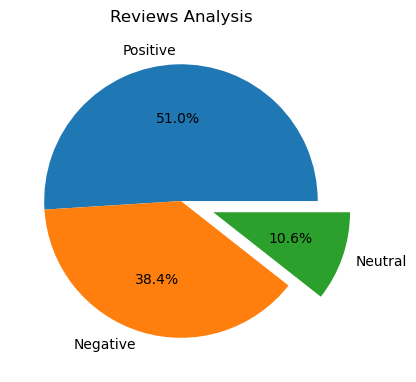

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [20]:
df.to_csv("BA_reviews.csv")

### Wordcloud
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

In [27]:
pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


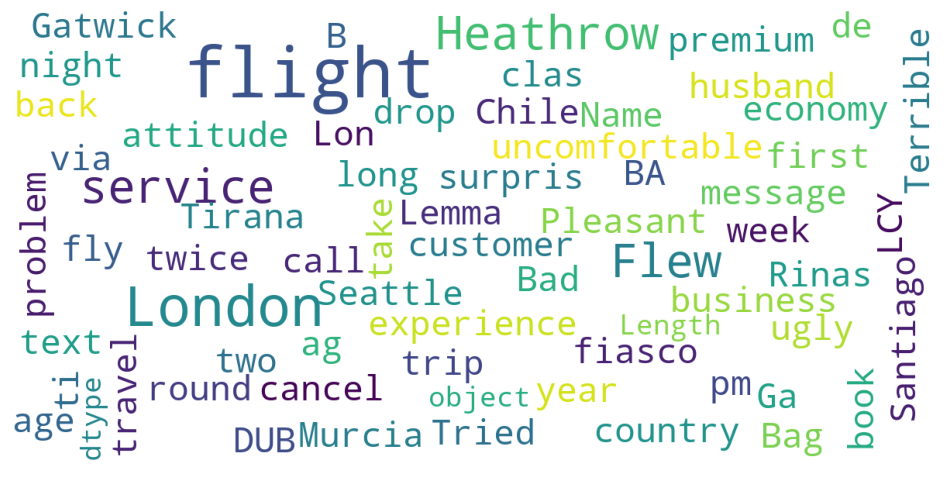

In [28]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)